In this report we examine the effect of including multiple hit mutations. We take the mutation rate $\mu$ the same for all hits, and let the fitness per mutation act multiplicative, $\alpha \rightarrow \alpha(1+s)$, so that a cell with $k$ hits has growth rate $\alpha (1+s_1)(1+s_2)\cdots (1+s_k)$.

For a cell with fitness $s$, a subsequent hit with fitness $s'$ thus changes its fitness to $s \rightarrow s + s' + ss'$.

In [1]:
include("../../src/competitiveSelection.jl")
using .CompetitiveSelection
# using Statistics
using CairoMakie
using ElasticArrays, StatsBase

In [2]:
myTheme = Theme(fontsize = 20)
set_theme!(myTheme)

In [5]:
params = Dict(
    :N => Int(2E4),
    :α => 1,
    :s => 0.2,
    :σ => 0.02,
    :T => 105,
    :μ => 1,
    :sType => "gamma",
    :q => 1,
)

runs = 5000

5000

In [6]:
@time solEns = CompetitiveSelection.evolvePop(params, runs=runs);

  6.050037 seconds (2.87 M allocations: 1.111 GiB, 4.88% gc time)


In [7]:
@time λ_tVaf_cid = CompetitiveSelection.fitSamplesGrowth(solEns, params);

 13.647942 seconds (59.04 M allocations: 4.420 GiB, 7.00% gc time)


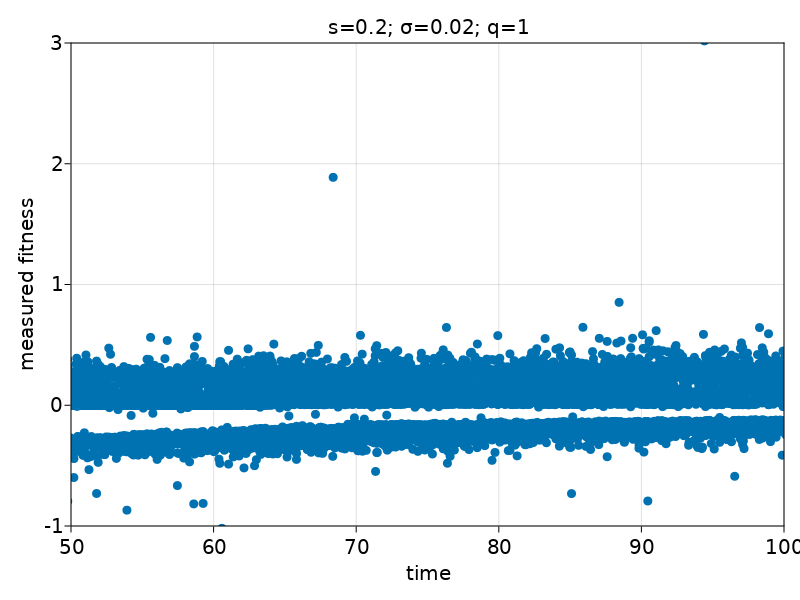

In [8]:
fig1 = Figure()
Axis(fig1[1,1],
    xlabel="time",
    ylabel="measured fitness",
    title="s=$(params[:s]); σ=$(params[:σ]); q=$(params[:q])"
)
scatter!(λ_tVaf_cid[1,:], λ_tVaf_cid[2,:])
xlims!(50,100)
ylims!(-1,3)
display(fig1)

In [17]:
params = Dict(
    :N => Int(2E4),
    :α => 1,
    :s => 0.3,
    :σ => 0.02,
    :T => 105,
    :μ => 1,
    :sType => "gamma",
    :q => 0.9,
)


runs = 5000
measureTime = 50
_q = [0, 0.3, 0.6, 1]
λ_tVaf_cid_Q = []
for q in _q
    params[:q] = q
    solEns = CompetitiveSelection.evolvePop(params, runs=runs);
    push!(λ_tVaf_cid_Q, CompetitiveSelection.fitSamplesGrowth(solEns, params, tMeasure=measureTime))
end


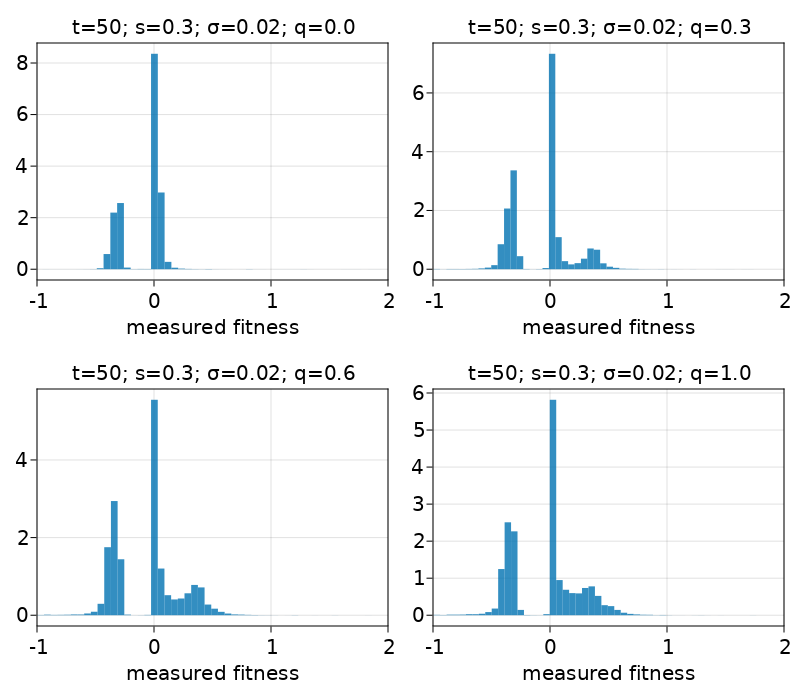

In [22]:
4sMax = 2
sMin = -1
fig2 = Figure(resolution=(800, 700))
for (i,q) in enumerate(_q)
    row = ceil(i/2) |> Int
    col = ((i-1) % 2) + 1
    Axis(
        fig2[row,col],
        xlabel="measured fitness",
        ylable="density of variants",
        title="t=$(measureTime); s=$(params[:s]); σ=$(params[:σ]); q=$q",
    )
    hist!(λ_tVaf_cid_Q[i][2, (λ -> λ .<=sMax && λ .>= sMin).(λ_tVaf_cid_Q[i][2,:])]; bins=50, normalization=:pdf)
    xlims!(sMin,sMax)
end
display(fig2)